# Simulating and studying an AR process

In [1]:
import numpy as np
from pandas import DataFrame as df
import importlib
import autoregressive as ar
from tqdm import trange

In [2]:
importlib.reload(ar) # if autoregressive.py is modified 

<module 'autoregressive' from 'c:\\Users\\alber\\python_projects\\fundamentals_of_interest_rates\\autoregressive.py'>

In [3]:
model = ar.AutoRegressive(steps=1000, paths=10, a=np.array([0.2, 0.2, 0.1]), start=0, dist='normal')
data = model.generate()

100%|██████████| 998/998 [00:00<00:00, 248954.17it/s]

10 different AR(2) processes of 1000 steps have been generated with increments following normal distribution


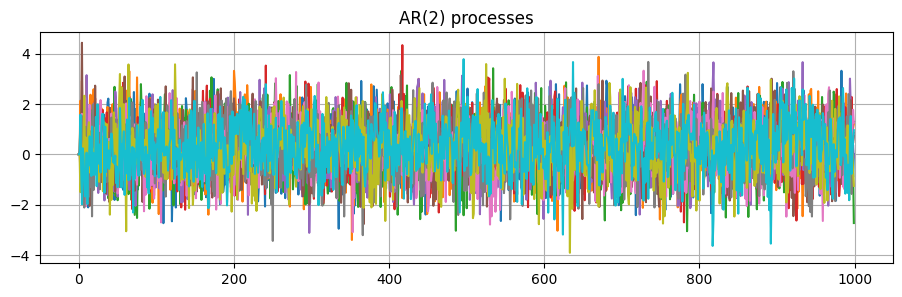

In [4]:
model.plot_paths(data=data)

In [5]:
coefficients = model.fit_ar()
df(coefficients).head()

,0,1,2,3,4,5,6,7,8,9
0,0.194851,0.249403,0.170985,0.171003,0.200557,0.206643,0.173570,0.185460,0.149938,0.217000
1,0.213999,0.230648,0.200278,0.207032,0.201019,0.123577,0.178488,0.252869,0.216446,0.245544
2,0.122578,0.056071,0.091873,0.051056,0.094037,0.131742,0.086646,0.058988,0.121981,0.036351


In [6]:
comparison = np.vstack([model.coefficients.mean(axis=1), model.a])
df(comparison.T).rename(columns={0: 'Average estimated coefficients', 1: 'Real coefficients'})

,Average estimated coefficients,Real coefficients
0,0.191941,0.2
1,0.206990,0.2
2,0.085132,0.1


In [7]:
moments, jb, acf, stat = model.study_errors(20)

100%|██████████| 998/998 [00:00<00:00, 252437.31it/s]



STUDYING ERRORS




DESCRIPTIVE STATISTICS


,0,1,2,3,4,5,6,7,8,9
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.000508,-0.000532,0.001357,-0.000233,0.000136,-0.000489,-0.000720,-0.000370,0.001005,-0.000330
std,1.000500,1.000500,1.000500,1.000500,1.000500,1.000500,1.000500,1.000500,1.000500,1.000500
min,-3.118851,-3.503621,-3.074520,-2.876664,-3.227879,-2.900707,-3.227719,-3.560174,-3.926716,-3.765917
25%,-0.685486,-0.673841,-0.625537,-0.708185,-0.659941,-0.715137,-0.656968,-0.655212,-0.671257,-0.674108
50%,0.011661,-0.022660,0.022595,-0.002227,-0.018432,-0.021195,0.012205,0.009510,0.027194,0.008311
75%,0.697617,0.705829,0.645364,0.670045,0.658491,0.698783,0.682810,0.646592,0.661162,0.703083
max,2.906212,3.294075,2.967229,4.030742,3.205385,3.962627,2.995059,3.267748,3.190251,3.327091




MOMENTS SUMMARY


,0,1,2,3,4,5,6,7,8,9
mean,0.000508,-0.000532,0.001357,-0.000233,0.000136,-0.000489,-0.000720,-0.00037,0.001005,-0.000330
variance,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
skewness,-0.067814,-0.034812,-0.085841,0.189151,0.137536,0.083045,-0.084360,-0.06760,-0.062724,-0.117067
kurtosis,2.820474,2.867637,3.031750,3.086925,2.993739,2.813700,2.912573,3.06748,3.324032,3.122911




JARQUE–BERA NORMALITY TEST RESULTS


,0,1,2,3,4,5,6,7,8,9
jb stat,2.109353,0.931980,1.270125,6.277856,3.154317,2.595573,1.504590,0.951366,5.030595,2.913560
p value,0.348305,0.627514,0.529902,0.043329,0.206561,0.273136,0.471284,0.621460,0.080839,0.232985




AUTOCORRELATION FUNCTION (ACF)


,0,1,2,3,4,5,6,7,8,9
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.155874,0.073568,0.113621,0.064086,0.117683,0.150573,0.104859,0.079293,0.154498,0.048270
2,0.232725,0.235079,0.209145,0.209841,0.211843,0.143779,0.186584,0.257655,0.234016,0.247104
3,0.069231,0.024690,0.010803,-0.047219,0.006829,0.066173,0.047157,0.068423,0.036702,0.033996
4,0.069439,0.030784,0.015152,0.039724,0.107144,0.051474,0.052436,0.027156,0.053628,0.089387
5,0.000837,-0.003342,-0.012791,-0.003802,0.046973,0.037649,0.081514,0.016565,-0.008440,0.010580
6,0.062310,-0.023064,0.041449,-0.012680,0.026256,-0.025853,0.042449,-0.005847,0.053835,0.051018
7,-0.015108,0.031320,-0.013064,-0.038429,0.027086,-0.053762,0.016126,-0.008124,-0.015565,0.034155
8,-0.009827,0.005932,0.035859,-0.053757,0.056859,-0.028083,0.005864,0.043324,-0.007135,0.073536
9,-0.017112,0.003429,0.008306,-0.039692,0.025634,-0.077180,0.013542,-0.016242,0.006146,0.026336
